In [12]:
from notebook_tools import *
sns.set(font_scale=2)
%matplotlib inline

# pp-SRC analysis

In [2]:
A=12

variables = [ 'Xb'   
             ,'Pmiss.P()'  ,'Pmiss.Pt()'  ,'theta_pq'     ,'p_over_q' , 'Pcm.Mag()'         
             ,'Prec.Px()'  , 'Prec.Py()'  , 'Prec.Pz()'
             ,'Pmiss.Px()' , 'Pmiss.Py()' , 'Pmiss.Pz()'
             ,'Q2' , 'Plead.Phi()' , 'Prec.Phi()' , 'Pmiss.Phi()'
             ,'theta_rec_q' ,'theta_miss_q'
             ,'protons[0].P()','protons[1].P()'
             ,'protons[0].Theta()',  'protons[1].Theta()' 
             ,'alpha[0]','alpha[1]'
             ,'pcmX','pcmY','pcmZ','Pcm.P()'    
            ]
ana_eep = TAnalysisEG2( path+"/AnaFiles" , "Ana_eep_in_ppSRCcut_DATA_%s"%dm.Target(A) , ROOT.TCut() )
anarr_eep = tree2array( ana_eep.GetTree() , branches=variables , selection=None )
ana = TAnalysisEG2( path+"/AnaFiles" , "Ana_ppSRCCut_DATA_%s"%dm.Target(A) , ROOT.TCut() )
anarr = tree2array( ana.GetTree() , branches=variables , selection=None )
df = read_root( path+"/AnaFiles/Ana_ppSRCcut_DATA_%s.root"%dm.Target(A) , columns=['Xb','pcmX','pcmY','pcmZ'] )
df['pcm'] = np.sqrt(np.square(df['pcmX']) + np.square(df['pcmY']) + np.square(df['pcmZ']))
df['prelX'] = 0.5*(anarr['Pmiss.Px()'] - anarr['Prec.Px()'])
df['prelY'] = 0.5*(anarr['Pmiss.Py()'] - anarr['Prec.Py()'])
df['prelZ'] = 0.5*(anarr['Pmiss.Pz()'] - anarr['Prec.Pz()'])
df['prel'] = np.sqrt(np.square(df['prelX']) + np.square(df['prelY']) + np.square(df['prelZ']))

In [51]:
mix = pd.read_csv('/Users/erezcohen/Desktop/DataMining/AnaFiles/Ana_ppSRCCut_mixed_%s.csv'%dm.Target(A))
print len(mix),'mixed pp'

122760 mixed pp


In [3]:
PmissBins = [[0.3,0.45]  , [0.45,0.55] , [0.55,0.65] , [0.65,0.75] , [0.75,1.0]]
anarr_Pmbins , anarr_eep_Pmbins = [] , []
for PmissBin in PmissBins:
    anarr_eep_Pmbins.append(anarr_eep[(PmissBin[0] < anarr_eep['Pmiss.P()']) & (anarr_eep['Pmiss.P()'] < PmissBin[1])])
    anarr_Pmbins.append(anarr[(PmissBin[0] < anarr['Pmiss.P()']) & (anarr['Pmiss.P()'] < PmissBin[1])])
    print "in %.2f<p(miss)<%.2f GeV/c, %d (e,e'p) / %d (e,e'pp)"%(PmissBin[0],PmissBin[1],len(anarr_Pmbins[-1]),len(anarr_eep_Pmbins[-1]))

in 0.30<p(miss)<0.45 GeV/c, 71 (e,e'p) / 4821 (e,e'pp)
in 0.45<p(miss)<0.55 GeV/c, 143 (e,e'p) / 2716 (e,e'pp)
in 0.55<p(miss)<0.65 GeV/c, 132 (e,e'p) / 1677 (e,e'pp)
in 0.65<p(miss)<0.75 GeV/c, 96 (e,e'p) / 830 (e,e'pp)
in 0.75<p(miss)<1.00 GeV/c, 56 (e,e'p) / 415 (e,e'pp)


In [4]:
Q2Bins = [[0,1.5]     , [1.5,2]     , [2,2.5]      , [2.5,5]]
anarr_Q2bins , anarr_eep_Q2bins = [] , []
for Q2Bin in Q2Bins:
    anarr_eep_Q2bins.append(anarr_eep[(Q2Bin[0] < anarr_eep['Q2']) & (anarr_eep['Q2'] < Q2Bin[1])])
    anarr_Q2bins.append(anarr[(Q2Bin[0] < anarr['Q2']) & (anarr['Q2'] < Q2Bin[1])])
    print "in %.2f<Q2<%.2f GeV/c, %d (e,e'p) / %d (e,e'pp)"%(Q2Bin[0],Q2Bin[1],len(anarr_Q2bins[-1]),len(anarr_eep_Q2bins[-1]))

in 0.00<Q2<1.50 GeV/c, 58 (e,e'p) / 1629 (e,e'pp)
in 1.50<Q2<2.00 GeV/c, 199 (e,e'p) / 4744 (e,e'pp)
in 2.00<Q2<2.50 GeV/c, 129 (e,e'p) / 2319 (e,e'pp)
in 2.50<Q2<5.00 GeV/c, 112 (e,e'p) / 1737 (e,e'pp)


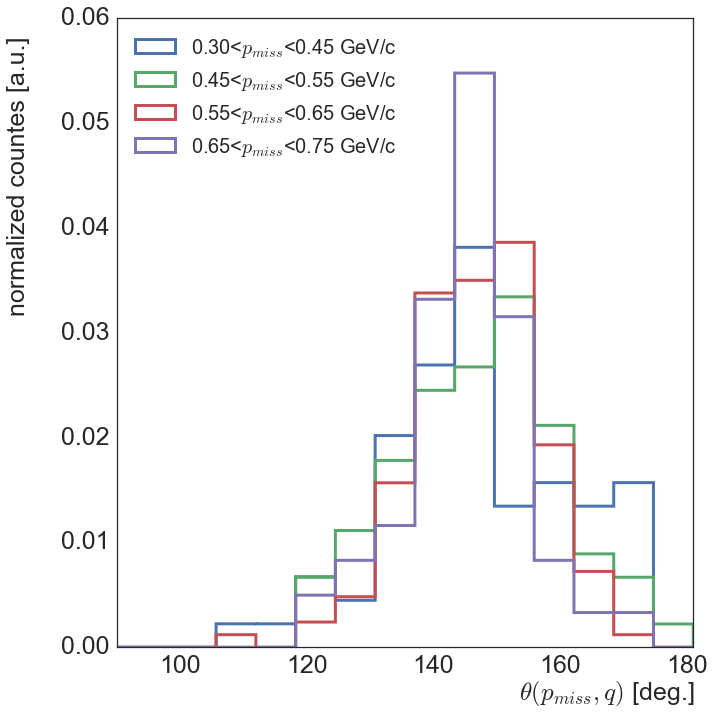

In [23]:
fig,ax=plt.subplots(figsize=(10,10))
hatches=['--' , '/' , '|' , '.' ]
ax.set_xlim(90,181)
for PmissBin,anarr_Pmbin,hatch in zip(PmissBins,anarr_Pmbins,hatches):
    plt.hist(anarr_Pmbin['TMath::RadToDeg()*theta_miss_q'],
             bins=np.linspace(-1,181,30),label='%.2f<$p_{miss}$<%.2f GeV/c'%(PmissBin[0],PmissBin[1]),
             histtype='step', linewidth=3,normed=1,alpha=1)#,hatch=hatch);

pt.set_axes(ax,'$\\theta(p_{miss},q)$ [deg.]','normalized countes [a.u.]')
ax.xaxis.set_label_coords(.85, -0.05)
ax.yaxis.set_label_coords(-.15, 0.75)


plt.legend(fontsize=20,loc='upper left')
plt.tight_layout()
plt.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter4/figures/epp/Theta_pmiss_q.pdf')

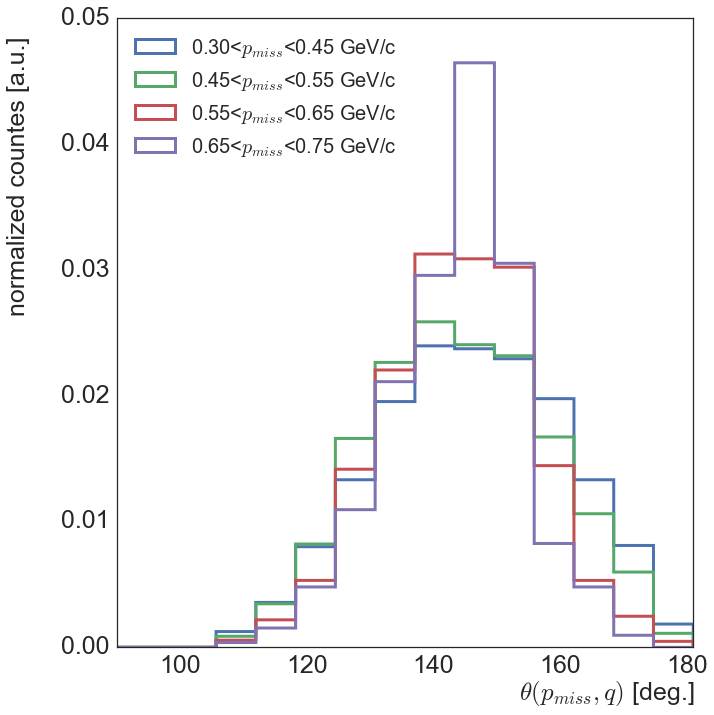

In [24]:
fig,ax=plt.subplots(figsize=(10,10))
hatches=['--' , '/' , '|' , '.' ]
ax.set_xlim(90,181)
for PmissBin,anarr_eep_Pmbin,hatch in zip(PmissBins,anarr_eep_Pmbins,hatches):
    plt.hist(anarr_eep_Pmbin['TMath::RadToDeg()*theta_miss_q'],
             bins=np.linspace(-1,181,30),label='%.2f<$p_{miss}$<%.2f GeV/c'%(PmissBin[0],PmissBin[1]),
             histtype='step', linewidth=3,normed=1);#,alpha=0.3,hatch=hatch);

pt.set_axes(ax,'$\\theta(p_{miss},q)$ [deg.]','normalized countes [a.u.]')
plt.legend(fontsize=20,loc='upper left')
ax.xaxis.set_label_coords(.85, -0.05)
ax.yaxis.set_label_coords(-.15, 0.75)

plt.tight_layout()
plt.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter4/figures/ep/Theta_pmiss_q.pdf')

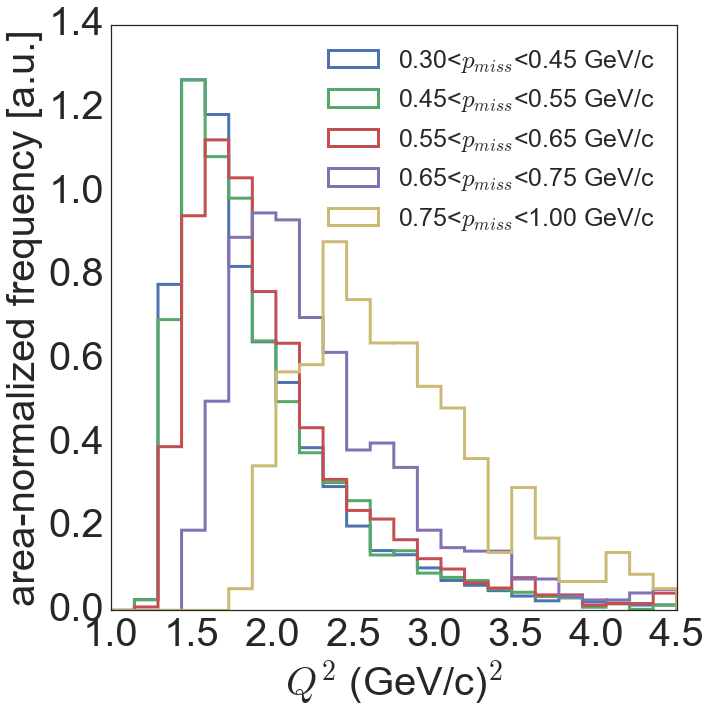

In [16]:
fig,ax=plt.subplots(figsize=(10,10))
for PmissBin,anarr_12C_eep_Pmbin in zip(PmissBins,anarr_12C_eep_Pmbins):
    plt.hist(anarr_12C_eep_Pmbin['Q2'],
             bins=np.linspace(1.,4.5,25),label='%.2f<$p_{miss}$<%.2f GeV/c'%(PmissBin[0],PmissBin[1]),
             histtype='step', linewidth=3 , normed=1);
pt.set_axes(ax,'$Q^{2}$ (GeV/c)$^{2}$','area-normalized frequency [a.u.]',fontsize=40)
ax.set_xlim(1.,4.5)
plt.legend(fontsize=25,loc='upper right')
plt.tight_layout()
plt.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter4/figures/ep/Q2inPmissBins.pdf')

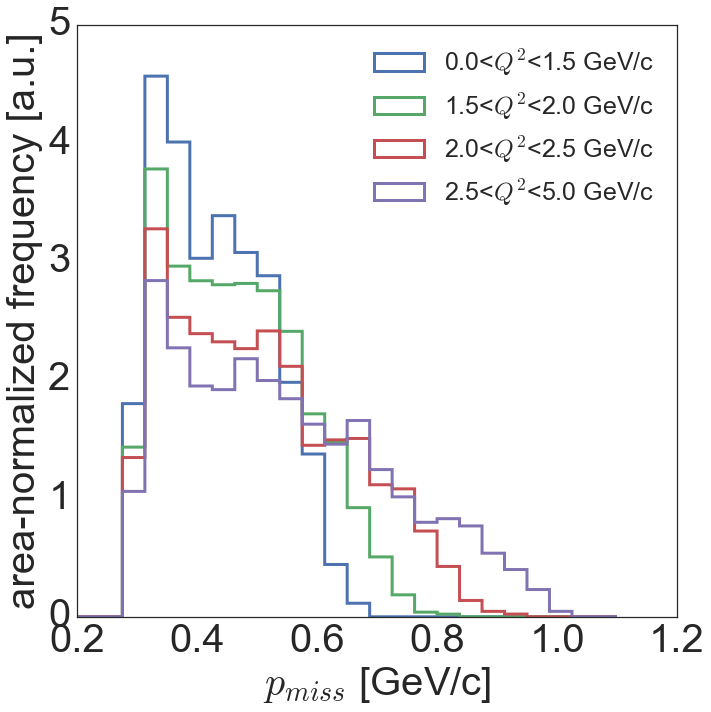

In [17]:
fig,ax=plt.subplots(figsize=(10,10))
for Q2bin,anarr_12C_eep_Q2bin in zip(Q2Bins,anarr_12C_eep_Q2bins):
    plt.hist(anarr_12C_eep_Q2bin['Pmiss.P()'],
             bins=np.linspace(0.2,1.1,25),label='%.1f<$Q^{2}$<%.1f GeV/c'%(Q2bin[0],Q2bin[1]),
             histtype='step', linewidth=3 , normed=1);
pt.set_axes(ax,'$p_{miss}$ [GeV/c]','area-normalized frequency [a.u.]',fontsize=40)
plt.legend(fontsize=25,loc='upper right')
plt.tight_layout()
plt.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter4/figures/ep/PmissinQ2Bins.pdf')

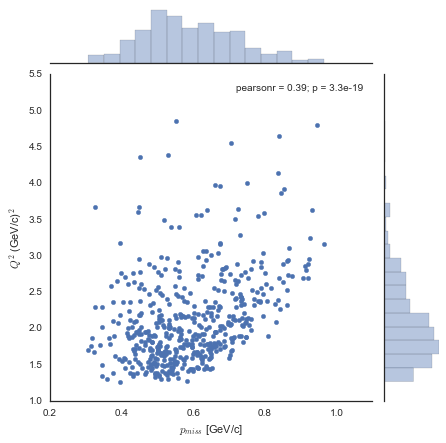

In [5]:
g = sns.jointplot(anarr_12C['Pmiss.P()'],anarr_12C['Q2'],cmap='hot_r')
g.set_axis_labels(xlabel='$p_{miss}$ [GeV/c]',ylabel='$Q^{2}$ (GeV/c)$^{2}$')
g.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter4/figures/ep/Q2vsPm.pdf')

In [44]:
def plot_p( i_plt=221 , var='pcmX' , label='$p^{x}_{c.m.}$ [Gev/c]' , bins=np.linspace(-1,1,20) 
             , tickx_start=0.5, tickx_skip=0.5, xlabel_coordinates=[.75, -0.15]):
    ax=figure.add_subplot(i_plt)
    plt.hist( df[var] , bins=bins , histtype='step',color='black', linewidth=3)
    
    weights=(mix[var]/mix[var])*(float(len(df))/len(mix))
#     plt.hist( mix.Original_pcmX , weights=weights)
    h,bins,patches = plt.hist( mix[var] , bins=bins , weights=weights , histtype='step' , color='green', linewidth=0 )
    mid = 0.5*(bins[1:] + bins[:-1])+0.5*(bins[1] - bins[0])
    plt.plot( mid , h , linestyle='--', drawstyle='steps' , linewidth=3 , color='green')

    set_axes(ax , x_label=label,fontsize=35)
    start, end = ax.get_ylim()
    ax.yaxis.set_ticks(np.arange(start+10, end+10, 30))
#     start, end = ax.get_xlim()
#     ax.xaxis.set_ticks(np.arange(start+tickx_start, end, tickx_skip))
    ax.xaxis.set_label_coords(xlabel_coordinates[0],xlabel_coordinates[1])
    ax.set_xlim(bins[0]-0.1,bins[-1]+0.1)

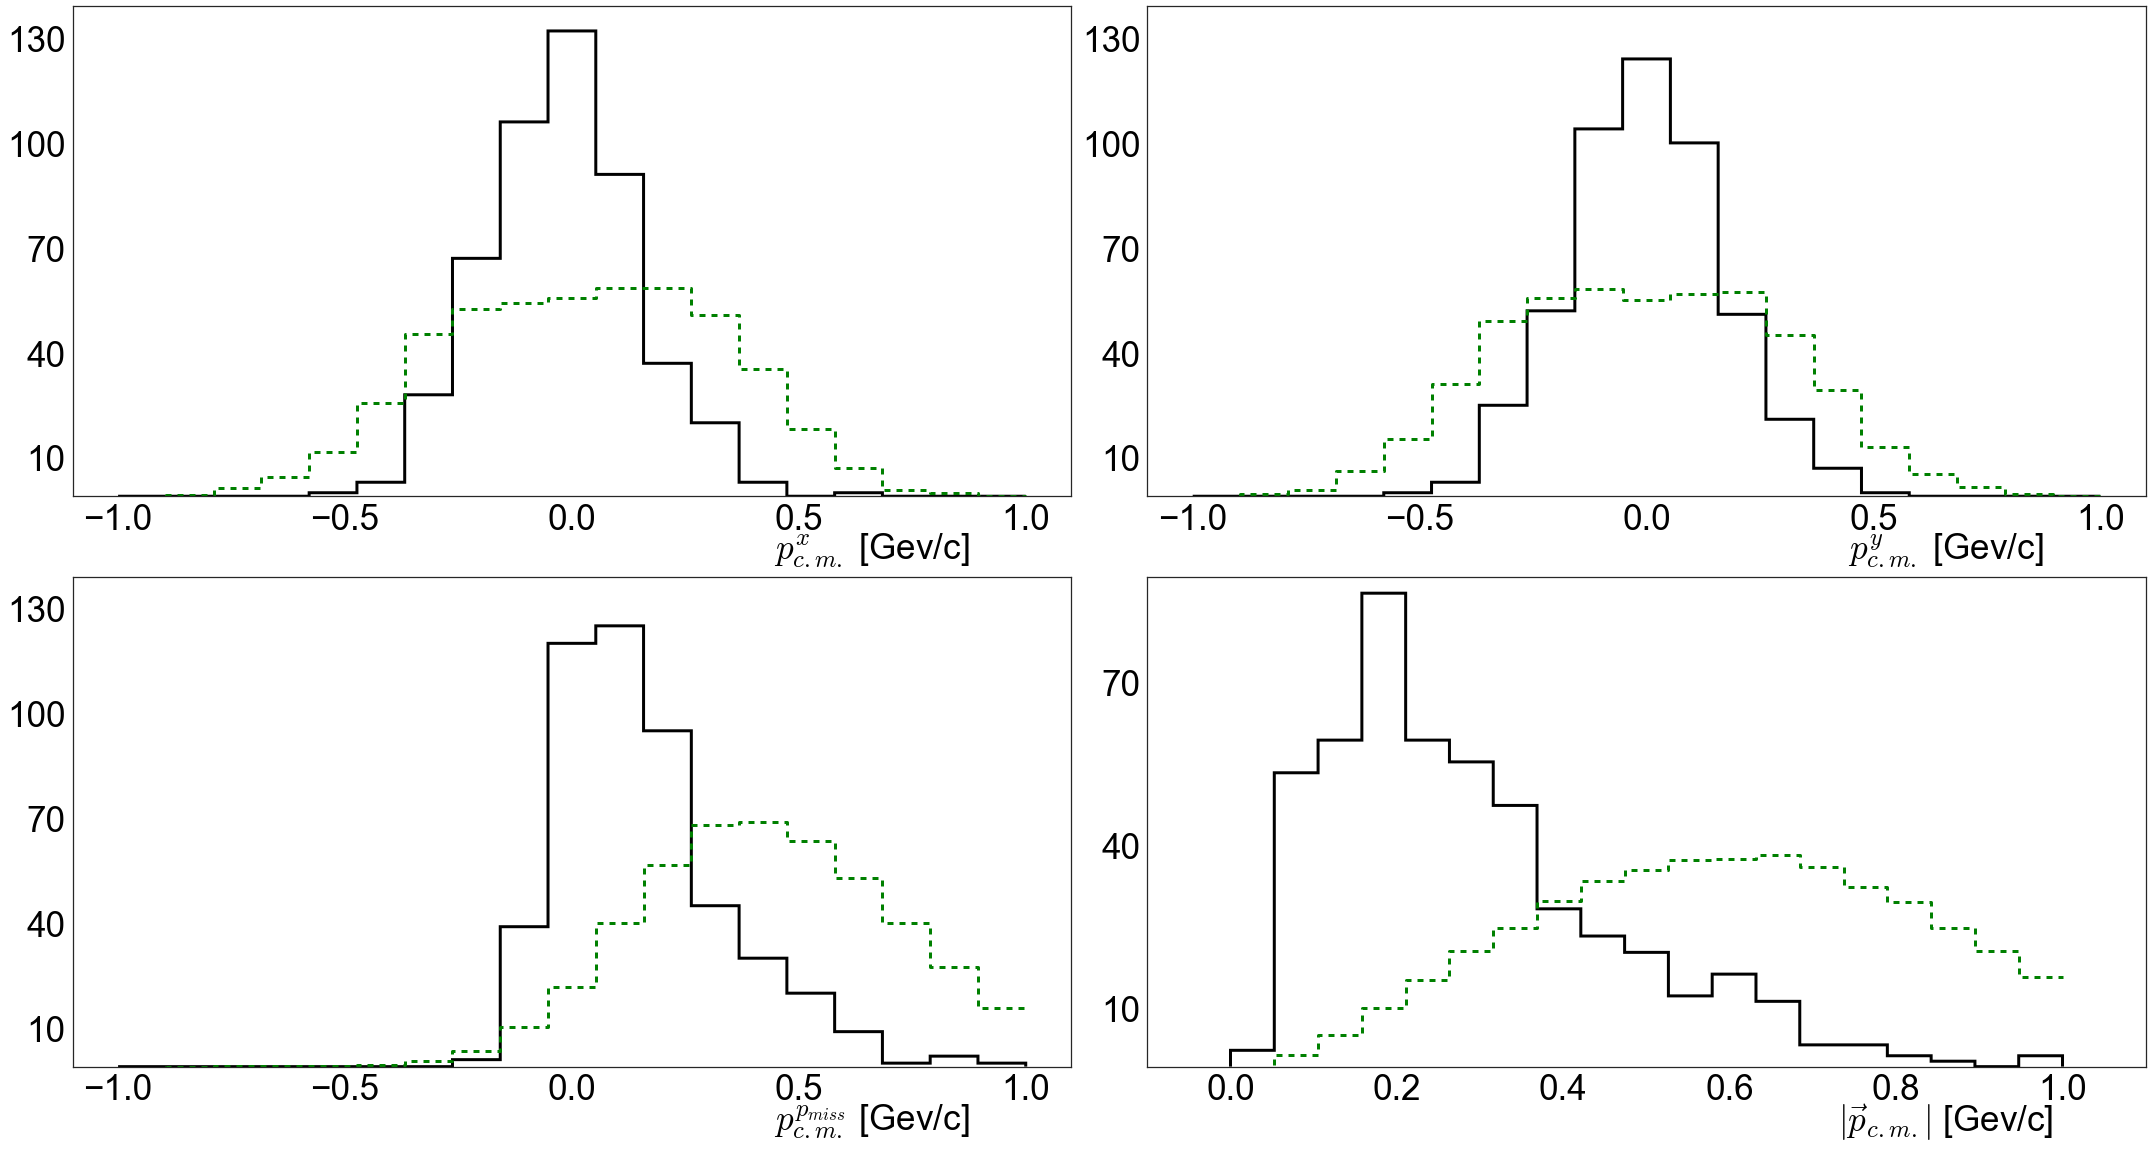

In [52]:
figure = plt.figure(figsize=(30,16))
xlabel_coordinates=[.8, -0.07]
plot_p( i_plt=221 , var='pcmX' , label='$p^{x}_{c.m.}$ [Gev/c]', xlabel_coordinates=xlabel_coordinates)
plot_p( i_plt=222 , var='pcmY' , label='$p^{y}_{c.m.}$ [Gev/c]', xlabel_coordinates=xlabel_coordinates)
plot_p( i_plt=223 , var='pcmZ' , label='$p^{p_{miss}}_{c.m.}$ [Gev/c]', xlabel_coordinates=xlabel_coordinates)
plot_p( i_plt=224 , var='pcm' , label='$|\\vec{p}_{c.m.}|$ [Gev/c]' , bins=np.linspace(0,1,20) , tickx_start=0.1, tickx_skip=0.3, xlabel_coordinates=xlabel_coordinates)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=.01)
plt.tight_layout()
plt.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter7/figures/Pcm.pdf')

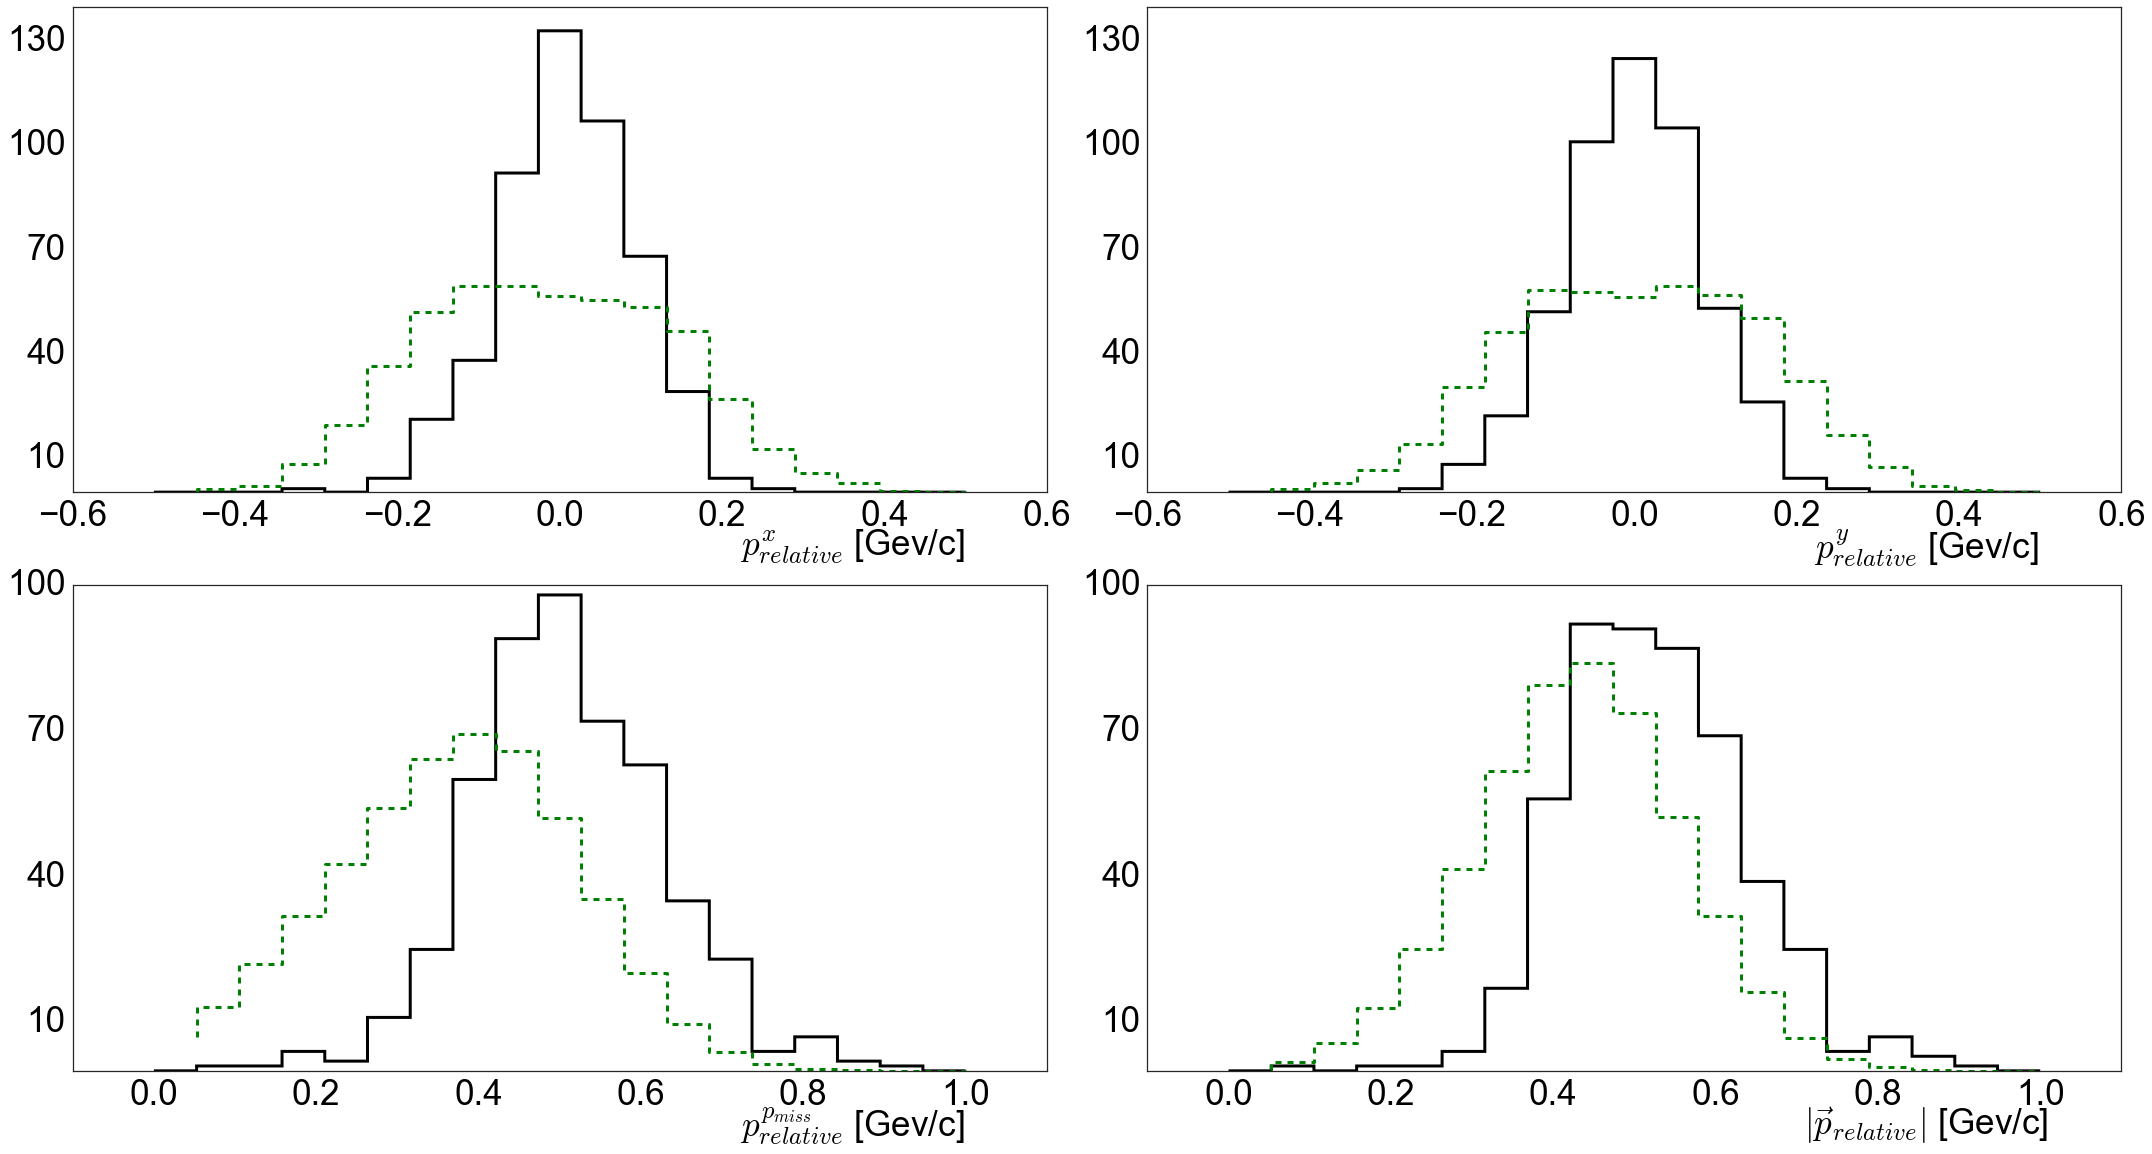

In [53]:
figure = plt.figure(figsize=(30,16))
xlabel_coordinates=[.8, -0.07]
plot_p( i_plt=221 , var='prelX' , label='$p^{x}_{relative}$ [Gev/c]', bins=np.linspace(-0.5,0.5,20), tickx_start=0.1, tickx_skip=0.3, xlabel_coordinates=xlabel_coordinates)
plot_p( i_plt=222 , var='prelY' , label='$p^{y}_{relative}$ [Gev/c]', bins=np.linspace(-0.5,0.5,20), tickx_start=0.1, tickx_skip=0.3, xlabel_coordinates=xlabel_coordinates)
plot_p( i_plt=223 , var='prelZ' , label='$p^{p_{miss}}_{relative}$ [Gev/c]', bins=np.linspace(0.,1,20), tickx_start=0.1, tickx_skip=0.4, xlabel_coordinates=xlabel_coordinates)
plot_p( i_plt=224 , var='prel' , label='$|\\vec{p}_{relative}|$ [Gev/c]' , bins=np.linspace(0,1,20) , tickx_start=0.1, tickx_skip=0.3, xlabel_coordinates=xlabel_coordinates)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.5)
plt.tight_layout()
plt.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter7/figures/Prelative.pdf')

# plots for Misak , Jan 2017

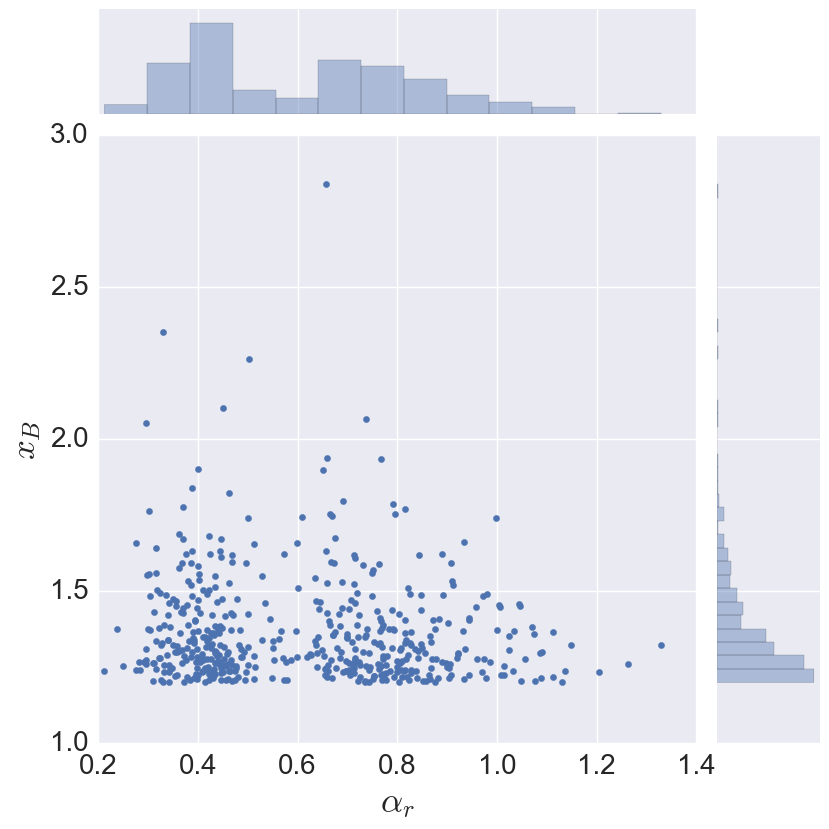

In [22]:
g = sns.jointplot(np.concatenate(anarr['alpha[1]']),anarr['Xb'],ratio=5,size=8,stat_func=None)
g.set_axis_labels(xlabel='$\\alpha_{r}$',ylabel='$x_{B}$',fontsize=25)

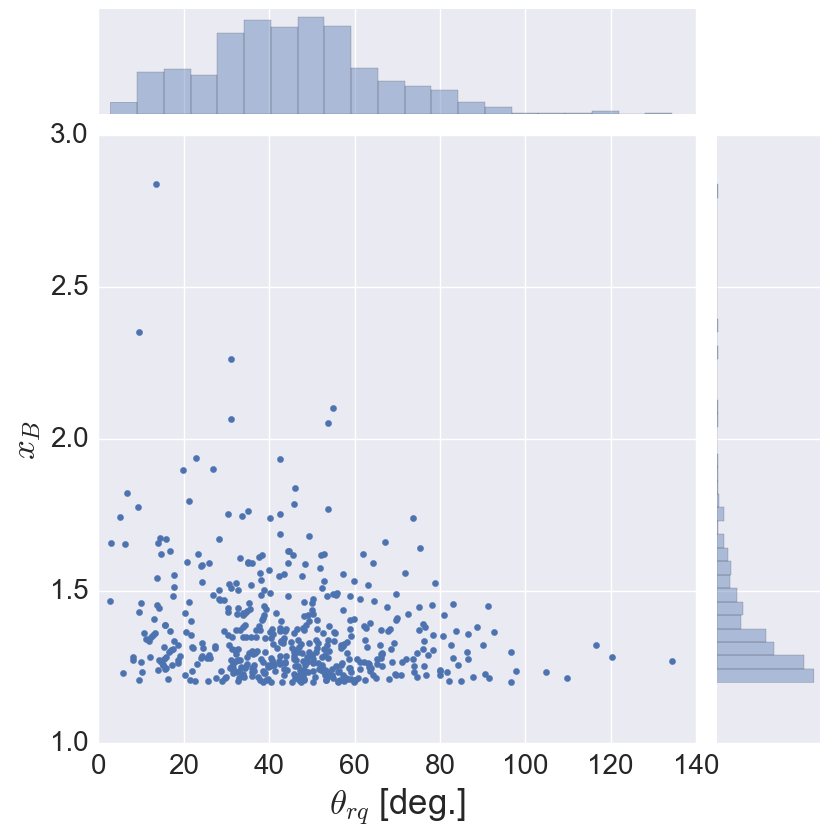

In [24]:
g = sns.jointplot(180/np.pi*anarr['theta_rec_q'],anarr['Xb'],ratio=5,size=8,stat_func=None)
g.set_axis_labels(xlabel='$\\theta_{rq}$ [deg.]',ylabel='$x_{B}$',fontsize=25)

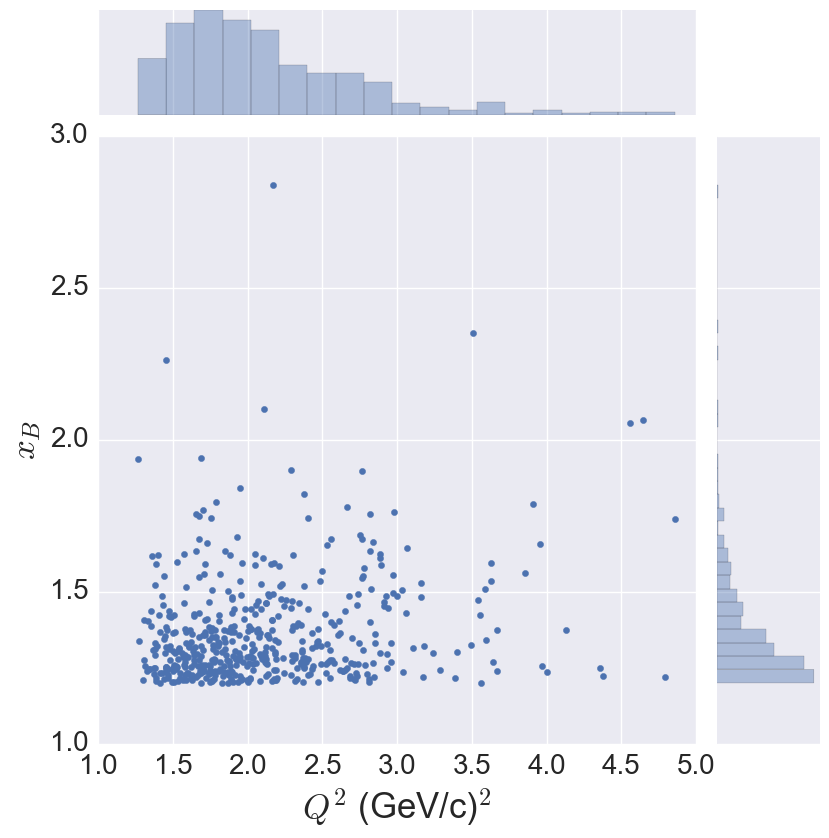

In [25]:
g = sns.jointplot(anarr['Q2'],anarr['Xb'],ratio=5,size=8,stat_func=None)
g.set_axis_labels(xlabel='$Q^{2}$ (GeV/c)$^2$',ylabel='$x_{B}$',fontsize=25)

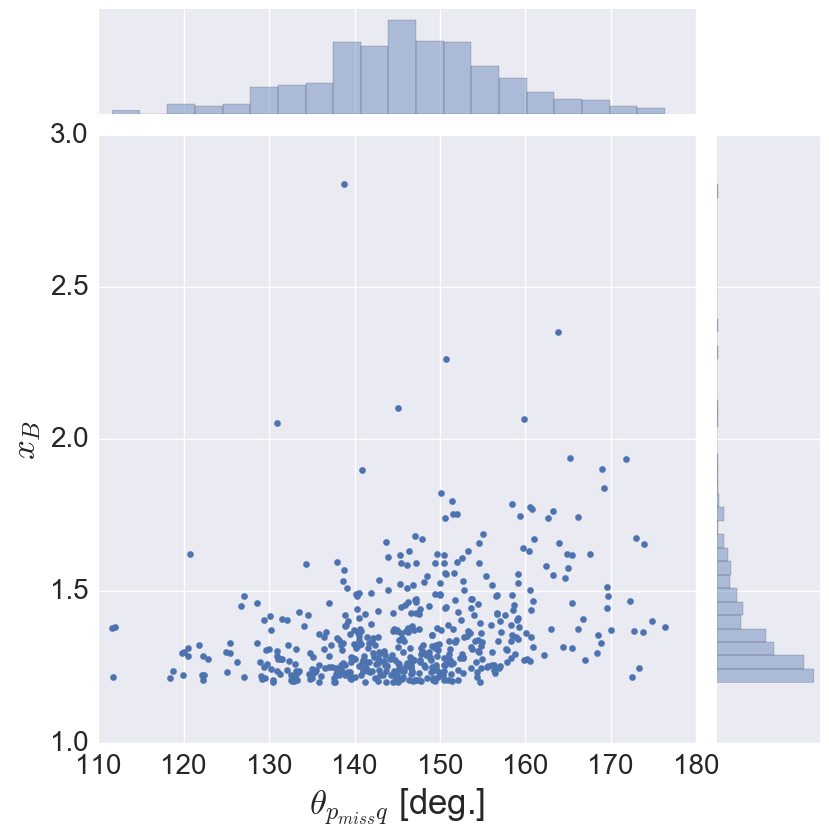

In [26]:
g = sns.jointplot(180/np.pi*anarr['theta_miss_q'],anarr['Xb'],ratio=5,size=8,stat_func=None)
g.set_axis_labels(xlabel='$\\theta_{p_{miss}q}$ [deg.]',ylabel='$x_{B}$',fontsize=25)

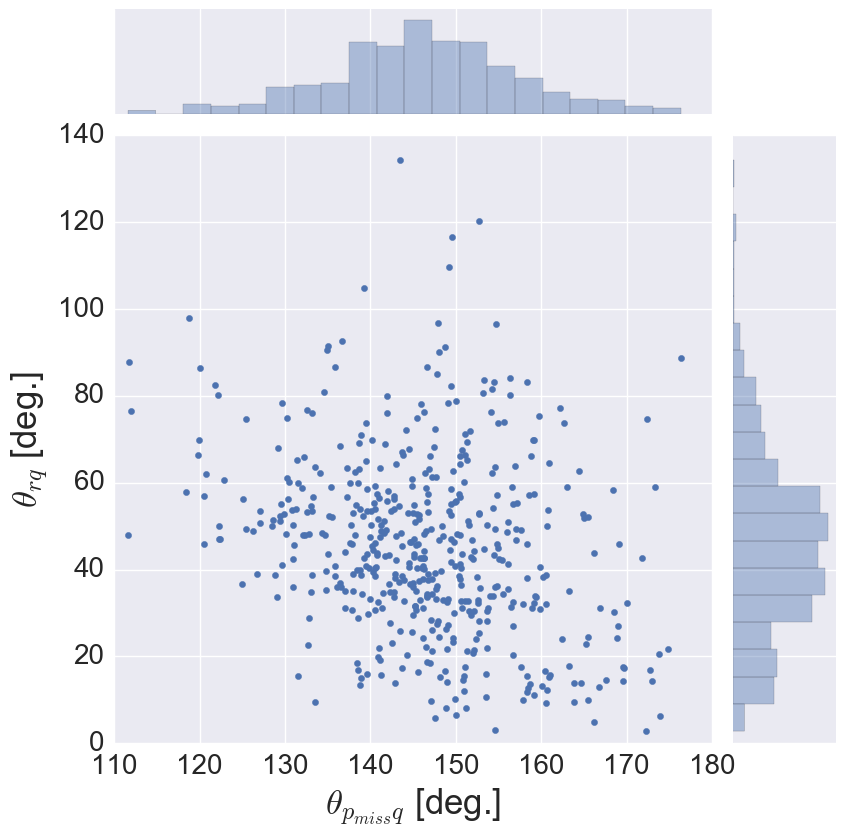

In [27]:
g = sns.jointplot(180/np.pi*anarr['theta_miss_q'],180/np.pi*anarr['theta_rec_q'],ratio=5,size=8,stat_func=None)
g.set_axis_labels(xlabel='$\\theta_{p_{miss}q}$ [deg.]',ylabel='$\\theta_{rq}$ [deg.]',fontsize=25)

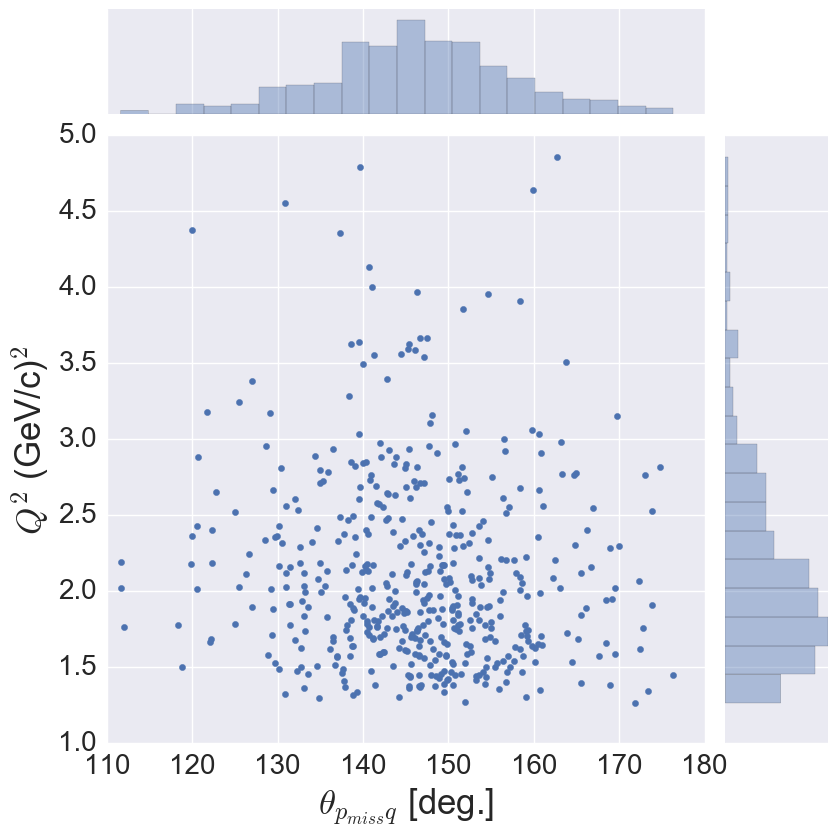

In [28]:
g = sns.jointplot(180/np.pi*anarr['theta_miss_q'],anarr['Q2'],ratio=5,size=8,stat_func=None)
g.set_axis_labels(xlabel='$\\theta_{p_{miss}q}$ [deg.]',ylabel='$Q^{2}$ (GeV/c)$^{2}$',fontsize=25)